In [9]:
import requests
from selenium import webdriver 
from bs4 import BeautifulSoup 
import time
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
# import seaborn as sns
import os
from openpyxl import load_workbook

In [10]:
# 방역본부 백신 일일 접종 현황 다운로드
main_url = "https://ncv.kdca.go.kr/board.es?mid=a11710000000&bid=0037#content"
driver = webdriver.Chrome("C:/driver/chromedriver")
driver.get(main_url)
time.sleep(2)  
driver.implicitly_wait(1) 
driver.find_element_by_xpath('//*[@id="listView"]/ul/li[2]/a').click()
time.sleep(2)  
driver.implicitly_wait(1) 
driver.find_element_by_xpath('//*[@id="content"]/div/div[1]/div[3]/div[2]/ul/li/a').click()
time.sleep(5)
driver.close()

In [12]:
file_name = os.listdir("C:/Users/YEIN/Downloads")

for file in file_name:
    if file.startswith('코로나바이러스'):
        file_name = file

file_name

'코로나바이러스감염증-19_백신별_일일_접종현황_20210716(0시 기준).xls'

In [13]:
datas = pd.read_excel(r'C:/Users/YEIN/Downloads/{}'.format(file_name))
datas

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,일자,전체 누적,NaN,아스트라제네카 누적,NaN,화이자 누적,NaN,얀센 누적,모더나 누적
4,NaN,1차,완료,1차,완료\n(AZ-PF교차포함),1차,완료\n(AZ-PF교차미포함),1차(완료),1차
...,...,...,...,...,...,...,...,...,...
141,2021-07-11 00:00:00,15587438,5882315,10399246,1267058,3996153,3485555,1129702,62337
142,2021-07-12 00:00:00,15618745,5975125,10399468,1320237,4027187,3525186,1129702,62388
143,2021-07-13 00:00:00,15726161,6084463,10399787,1387677,4134133,3567084,1129702,62539
144,2021-07-14 00:00:00,15837964,6204664,10400211,1470780,4244877,3604182,1129702,63174


In [14]:
d_columns = ['일자','ALL(1)','ALL(FIN)','아제(1)','아제(FIN)','화이자(1)','화이자(FIN)','얀센','모더나']

In [15]:
datas.tail(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
136,2021-07-06 00:00:00,15442420,5499205,10397872,1056128,3867950,3313375,1129702,46896
137,2021-07-07 00:00:00,15477806,5588160,10398361,1099182,3898831,3359276,1129702,50912
138,2021-07-08 00:00:00,15515821,5694040,10398791,1150903,3931607,3413435,1129702,55721
139,2021-07-09 00:00:00,15574096,5841847,10399230,1234594,3982839,3477551,1129702,62325
140,2021-07-10 00:00:00,15586962,5881209,10399241,1266124,3995682,3485383,1129702,62337
141,2021-07-11 00:00:00,15587438,5882315,10399246,1267058,3996153,3485555,1129702,62337
142,2021-07-12 00:00:00,15618745,5975125,10399468,1320237,4027187,3525186,1129702,62388
143,2021-07-13 00:00:00,15726161,6084463,10399787,1387677,4134133,3567084,1129702,62539
144,2021-07-14 00:00:00,15837964,6204664,10400211,1470780,4244877,3604182,1129702,63174
145,2021-07-15 00:00:00,15960609,6326705,10400653,1567623,4367080,3629380,1129702,63174


In [16]:
datas = datas.drop(index=[0,1,2,3,4,5], axis=0)

In [17]:
datas.columns = d_columns
datas = datas.reset_index()

In [18]:
del datas['index']

In [19]:
datas

,일자,ALL(1),ALL(FIN),아제(1),아제(FIN),화이자(1),화이자(FIN),얀센,모더나
0,2021-02-26 00:00:00,20308,0,20308,0,0,0,0,0
1,2021-02-27 00:00:00,21732,0,21414,0,318,0,0,0
2,2021-02-28 00:00:00,22596,0,21991,0,605,0,0,0
3,2021-03-01 00:00:00,24071,0,23173,0,898,0,0,0
4,2021-03-02 00:00:00,90484,0,88957,0,1527,0,0,0
...,...,...,...,...,...,...,...,...,...
135,2021-07-11 00:00:00,15587438,5882315,10399246,1267058,3996153,3485555,1129702,62337
136,2021-07-12 00:00:00,15618745,5975125,10399468,1320237,4027187,3525186,1129702,62388
137,2021-07-13 00:00:00,15726161,6084463,10399787,1387677,4134133,3567084,1129702,62539
138,2021-07-14 00:00:00,15837964,6204664,10400211,1470780,4244877,3604182,1129702,63174


C:\Users\YEIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\YEIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\YEIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\YEIN\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)


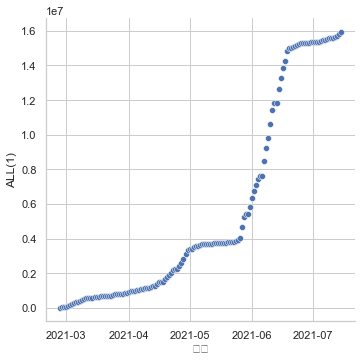

In [20]:
sns.relplot(x='일자',y='ALL(1)', data=datas);

In [161]:
world_vac = pd.read_csv('./vaccinations.csv')

In [162]:
world_vac

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33396,Zimbabwe,ZWE,2021-07-09,1464065.0,875182.0,588883.0,30487.0,15907.0,9.85,5.89,3.96,1070.0
33397,Zimbabwe,ZWE,2021-07-10,NaN,NaN,NaN,NaN,16878.0,NaN,NaN,NaN,1136.0
33398,Zimbabwe,ZWE,2021-07-11,1491397.0,895980.0,595417.0,NaN,18598.0,10.03,6.03,4.01,1251.0
33399,Zimbabwe,ZWE,2021-07-12,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0


In [163]:
world_vac = world_vac.fillna(0)

In [164]:
# grouped = world_vac['total_vaccinations'].groupby(world_vac['location'])

In [165]:
g1 = world_vac.groupby(world_vac['location']).sum().reset_index()
g1

,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,1.271652e+07,1.009362e+07,2.368962e+06,6.874000e+03,9.780020e+05,32.68,25.95,6.09,25140.0
1,Africa,3.553339e+09,2.586904e+09,9.975469e+08,5.720451e+07,5.614297e+07,265.04,192.90,74.39,41879.0
2,Albania,5.681666e+07,2.584582e+07,1.672462e+07,7.551200e+05,1.025973e+06,1974.29,898.10,581.15,356500.0
3,Algeria,2.575030e+06,2.575030e+06,0.000000e+00,3.000000e+01,2.437370e+06,5.87,5.87,0.00,55592.0
4,Andorra,5.094600e+05,3.294820e+05,1.185200e+05,4.802000e+03,6.578100e+04,659.36,426.44,153.42,851369.0
...,...,...,...,...,...,...,...,...,...,...
225,Wallis and Futuna,1.114040e+05,6.929300e+04,4.211100e+04,0.000000e+00,8.576000e+03,990.60,616.17,374.44,762578.0
226,World,2.141540e+11,1.191454e+11,5.418780e+10,3.541237e+09,3.451123e+09,2747.49,1528.54,695.22,442752.0
227,Yemen,1.593637e+06,1.585060e+06,8.577000e+03,0.000000e+00,2.859460e+05,5.34,5.31,0.03,9579.0
228,Zambia,5.697166e+06,5.215819e+06,4.813470e+05,1.299980e+05,1.927170e+05,30.95,28.32,2.63,10484.0


In [166]:
len(g1)

230

In [167]:
g1 = g1.drop(['total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','daily_vaccinations_per_million'],axis=1)

In [168]:
g1

,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations
0,Afghanistan,1.271652e+07,1.009362e+07,2.368962e+06,6.874000e+03,9.780020e+05
1,Africa,3.553339e+09,2.586904e+09,9.975469e+08,5.720451e+07,5.614297e+07
2,Albania,5.681666e+07,2.584582e+07,1.672462e+07,7.551200e+05,1.025973e+06
3,Algeria,2.575030e+06,2.575030e+06,0.000000e+00,3.000000e+01,2.437370e+06
4,Andorra,5.094600e+05,3.294820e+05,1.185200e+05,4.802000e+03,6.578100e+04
...,...,...,...,...,...,...
225,Wallis and Futuna,1.114040e+05,6.929300e+04,4.211100e+04,0.000000e+00,8.576000e+03
226,World,2.141540e+11,1.191454e+11,5.418780e+10,3.541237e+09,3.451123e+09
227,Yemen,1.593637e+06,1.585060e+06,8.577000e+03,0.000000e+00,2.859460e+05
228,Zambia,5.697166e+06,5.215819e+06,4.813470e+05,1.299980e+05,1.927170e+05


In [169]:
del_nat = ['Africa',
 'Anguilla',
 'Aruba',
 'Asia',
 'Bermuda',
 'British Virgin Islands',
 'Cayman Islands',
 'Cook Islands',
 'Curacao',
 'England',
 'Europe',
 'European Union',
 'Faeroe Islands',
 'Falkland Islands',
 'French Polynesia',
 'Gibraltar',
 'Greenland',
 'Guernsey',
 'High income',
 'Hong Kong',
 'Isle of Man',
 'Jersey',
 'Kosovo',
 'Low income',
 'Lower middle income',
 'Macao',
 'Montserrat',
 'New Caledonia',
 'Niue',
 'North America',
 'Northern Cyprus',
 'Northern Ireland',
 'Oceania',
 'Palestine',
 'Pitcairn',
 'Saint Helena',
 'Scotland',
 'Sint Maarten (Dutch part)',
 'South America',
 'Taiwan',
 'Turks and Caicos Islands',
 'Upper middle income',
 'Wales',
 'Wallis and Futuna',
 'World']

In [170]:
del_nat1 = ['Bonaire Sint Eustatius and Saba', 'Egypt', 'Kyrgyzstan', 'Nauru', 'Syria', 'Tonga', 'Turkmenistan','Tuvalu', 'Venezuela']

In [171]:
del_nat = del_nat+del_nat1

In [172]:
del_nat

['Africa',
 'Anguilla',
 'Aruba',
 'Asia',
 'Bermuda',
 'British Virgin Islands',
 'Cayman Islands',
 'Cook Islands',
 'Curacao',
 'England',
 'Europe',
 'European Union',
 'Faeroe Islands',
 'Falkland Islands',
 'French Polynesia',
 'Gibraltar',
 'Greenland',
 'Guernsey',
 'High income',
 'Hong Kong',
 'Isle of Man',
 'Jersey',
 'Kosovo',
 'Low income',
 'Lower middle income',
 'Macao',
 'Montserrat',
 'New Caledonia',
 'Niue',
 'North America',
 'Northern Cyprus',
 'Northern Ireland',
 'Oceania',
 'Palestine',
 'Pitcairn',
 'Saint Helena',
 'Scotland',
 'Sint Maarten (Dutch part)',
 'South America',
 'Taiwan',
 'Turks and Caicos Islands',
 'Upper middle income',
 'Wales',
 'Wallis and Futuna',
 'World',
 'Bonaire Sint Eustatius and Saba',
 'Egypt',
 'Kyrgyzstan',
 'Nauru',
 'Syria',
 'Tonga',
 'Turkmenistan',
 'Tuvalu',
 'Venezuela']

In [173]:
n_index = []
for i in range(230):
    for j in range(len(del_nat)):
        if g1['location'][i] == del_nat[j]:
            n_index.append(i)

In [174]:
g1.drop(index=n_index, inplace=True)

In [145]:
g1 = g1.reset_index()

In [146]:
del g1['index']

In [153]:
vac_data = g1

In [156]:
vac_data

,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations
0,Afghanistan,12716525.0,10093624.0,2368962.0,6874.0,978002.0
1,Albania,56816656.0,25845822.0,16724617.0,755120.0,1025973.0
2,Algeria,2575030.0,2575030.0,0.0,30.0,2437370.0
3,Andorra,509460.0,329482.0,118520.0,4802.0,65781.0
4,Angola,16412310.0,11683758.0,4728552.0,0.0,1541670.0
...,...,...,...,...,...,...
171,Vanuatu,38238.0,38238.0,0.0,0.0,12895.0
172,Vietnam,128835843.0,126729399.0,6222295.0,3446613.0,4055208.0
173,Yemen,1593637.0,1585060.0,8577.0,0.0,285946.0
174,Zambia,5697166.0,5215819.0,481347.0,129998.0,192717.0


In [130]:
# n1_index = []
# for i in range(185):
#     for j in range(len(del_nat1)):
#         if g1['location'][i] == del_nat1[j]:
#             n1_index.append(i)

In [98]:
ppp = []
for i in g1['location']:
    ppp.append(i)
ppp

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Honduras',
 'Hunga

In [109]:
g1.drop(index=n1_index, inplace=True)

In [111]:
n1_index = []

In [95]:
real = ['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Côte D'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia (Republic of The)',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran (Islamic Republic of)',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kiribati',
 'Kuwait',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'Mali',
 'Malta',
 'Marshall Islands',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Micronesia (Federated States of)',
 'Monaco',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nauru',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Niger',
 'Nigeria',
 'North Macedonia',
 'Norway',
 'Oman',
 'Pakistan',
 'Palau',
 'Panama',
 'Papua New Guinea',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Qatar',
 'Republic of Korea',
 'Republic of Moldova',
 'Romania',
 'Russian Federation',
 'Rwanda',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'San Marino',
 'Sao Tome and Principe',
 'Saudi Arabia',
 'Senegal',
 'Serbia',
 'Seychelles',
 'Sierra Leone',
 'Singapore',
 'Slovakia',
 'Slovenia',
 'Solomon Islands',
 'Somalia',
 'South Africa',
 'South Sudan',
 'Spain',
 'Sri Lanka',
 'Sudan',
 'Suriname',
 'Sweden',
 'Switzerland',
 'Syrian Arab Republic',
 'Tajikistan',
 'Thailand',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Trinidad and Tobago',
 'Tunisia',
 'Turkey',
 'Turkmenistan',
 'Tuvalu',
 'Uganda',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Uruguay',
 'Uzbekistan',
 'Vanuatu',
 'Venezuela, Bolivarian Republic of',
 'Viet Nam',
 'Yemen',
 'Zambia',
 'Zimbabwe']

In [66]:
#230 
nall = []
for i in g1['location']:
    nall.append(i)

In [69]:
# 가공된 국가명이랑 일치하는 국가 - 165개
dd = []
for i in g1['location']:
    if i in real:
        dd.append(i)

In [71]:
for i in dd:
    nall.remove(i)

In [76]:
nall

['Africa',
 'Anguilla',
 'Aruba',
 'Asia',
 'Bermuda',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'British Virgin Islands',
 'Brunei',
 'Cape Verde',
 'Cayman Islands',
 'Cook Islands',
 "Cote d'Ivoire",
 'Curacao',
 'Czechia',
 'Democratic Republic of Congo',
 'England',
 'Europe',
 'European Union',
 'Faeroe Islands',
 'Falkland Islands',
 'French Polynesia',
 'Gambia',
 'Gibraltar',
 'Greenland',
 'Guernsey',
 'Guinea-Bissau',
 'High income',
 'Hong Kong',
 'Iran',
 'Isle of Man',
 'Jersey',
 'Kosovo',
 'Laos',
 'Low income',
 'Lower middle income',
 'Macao',
 'Moldova',
 'Montserrat',
 'New Caledonia',
 'Niue',
 'North America',
 'Northern Cyprus',
 'Northern Ireland',
 'Oceania',
 'Palestine',
 'Pitcairn',
 'Russia',
 'Saint Helena',
 'Scotland',
 'Sint Maarten (Dutch part)',
 'South America',
 'South Korea',
 'Syria',
 'Taiwan',
 'Timor',
 'Turks and Caicos Islands',
 'United Kingdom',
 'United States',
 'Upper middle income',
 'Venezuela',
 'Vietnam',
 'Wales',
 'Wallis an

In [74]:
for i in dd:
    real.remove(i)

In [75]:
real

['Bolivia (Plurinational State of)',
 'Brunei Darussalam',
 'Burundi',
 'Cabo Verde',
 "Côte D'Ivoire",
 'Czech Republic',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Eritrea',
 'Gambia (Republic of The)',
 'Guinea Bissau',
 'Haiti',
 'Iran (Islamic Republic of)',
 'Kiribati',
 "Lao People's Democratic Republic",
 'Marshall Islands',
 'Micronesia (Federated States of)',
 'Palau',
 'Republic of Korea',
 'Republic of Moldova',
 'Russian Federation',
 'Syrian Arab Republic',
 'Timor-Leste',
 'United Kingdom of Great Britain and Northern Ireland',
 'United Republic of Tanzania',
 'United States of America',
 'Venezuela, Bolivarian Republic of',
 'Viet Nam']